# Dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data = iris.data,columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_lst = ['setosa', 'versicolor', 'virginica']

# Decision Tree

In [5]:
from sklearn.model_selection import train_test_split

X = iris.data
Y = iris.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=24)

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [35, 38, 32]\nclass = versicolor'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 70\nvalue = [0, 38, 32]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]\nclass = virginica')]

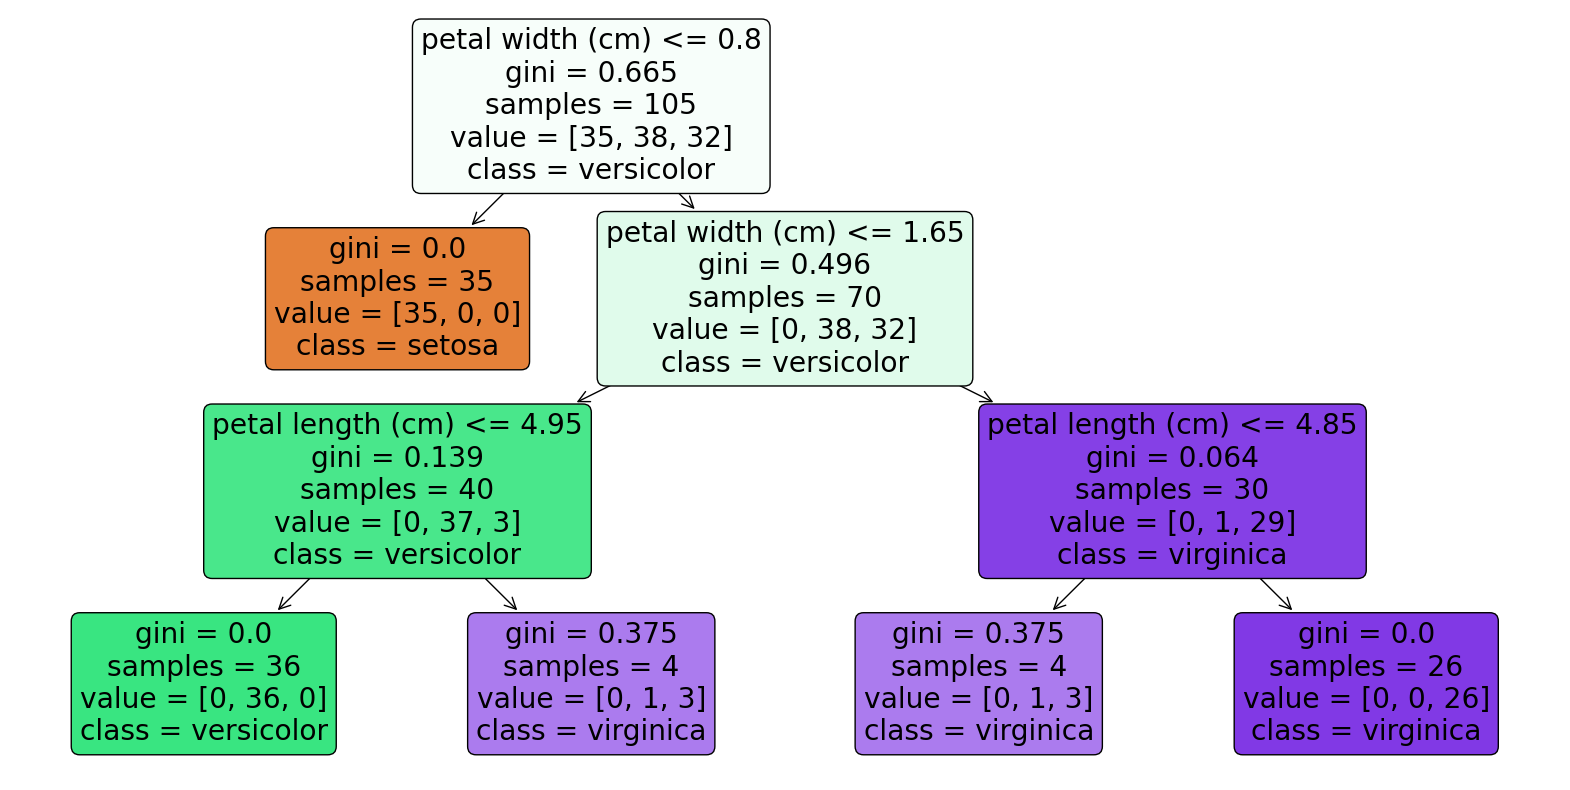

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris_lst,rounded=True)
# plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris.target_names,rounded=True)

# Rnadom Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=38)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=38)

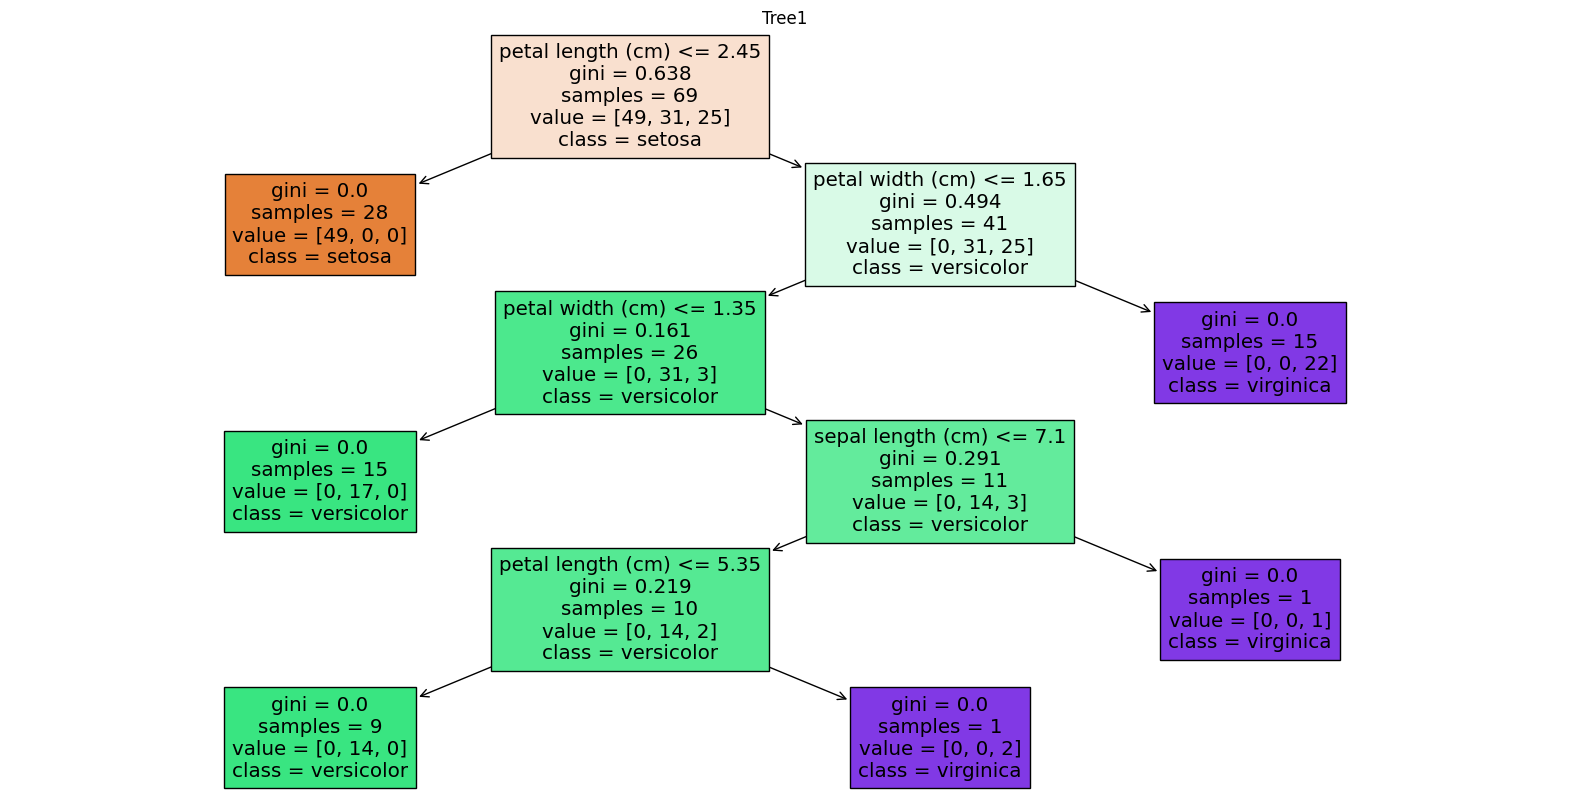

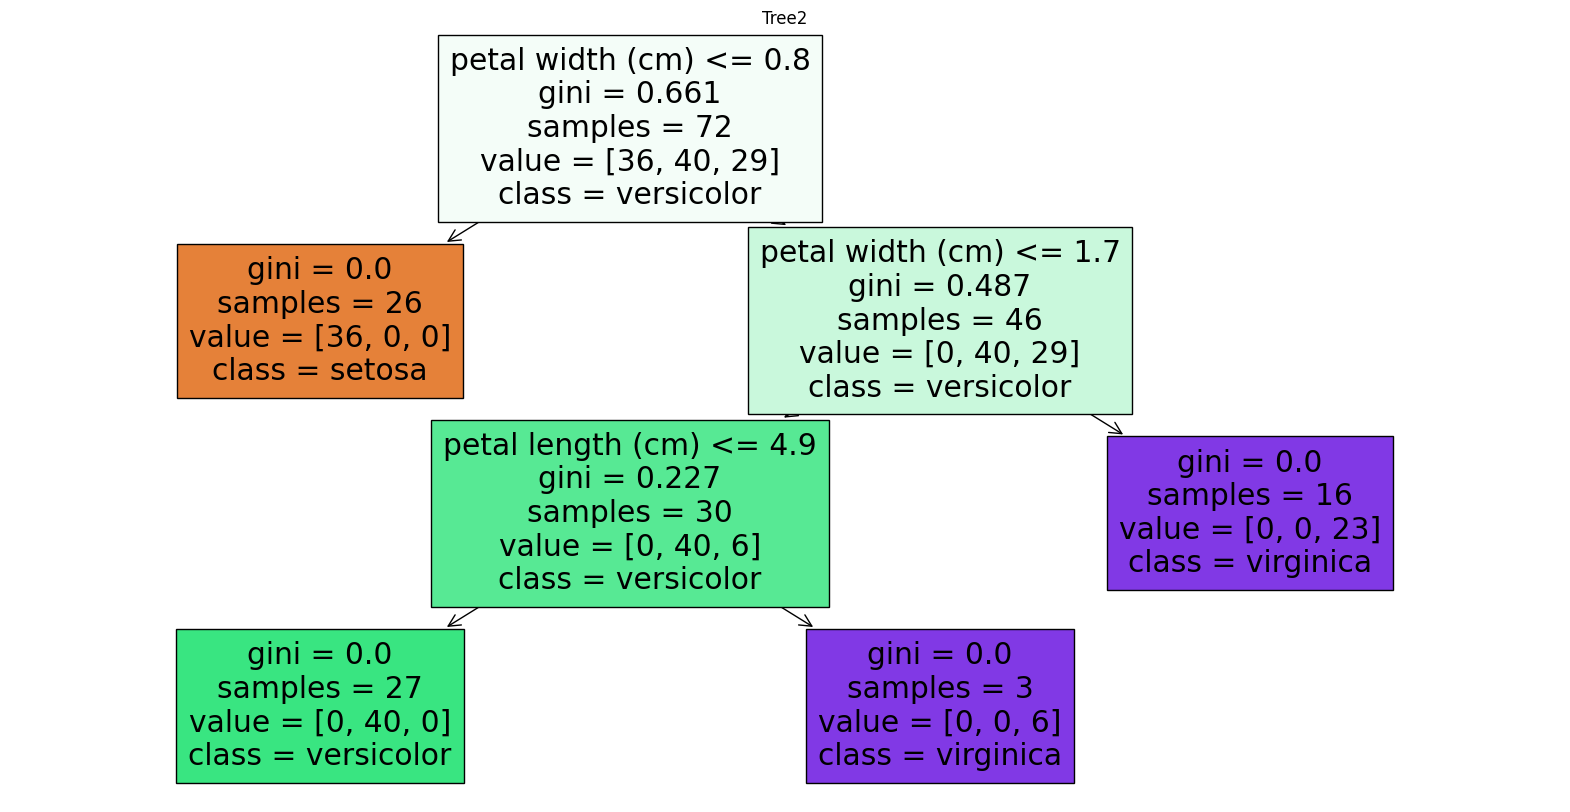

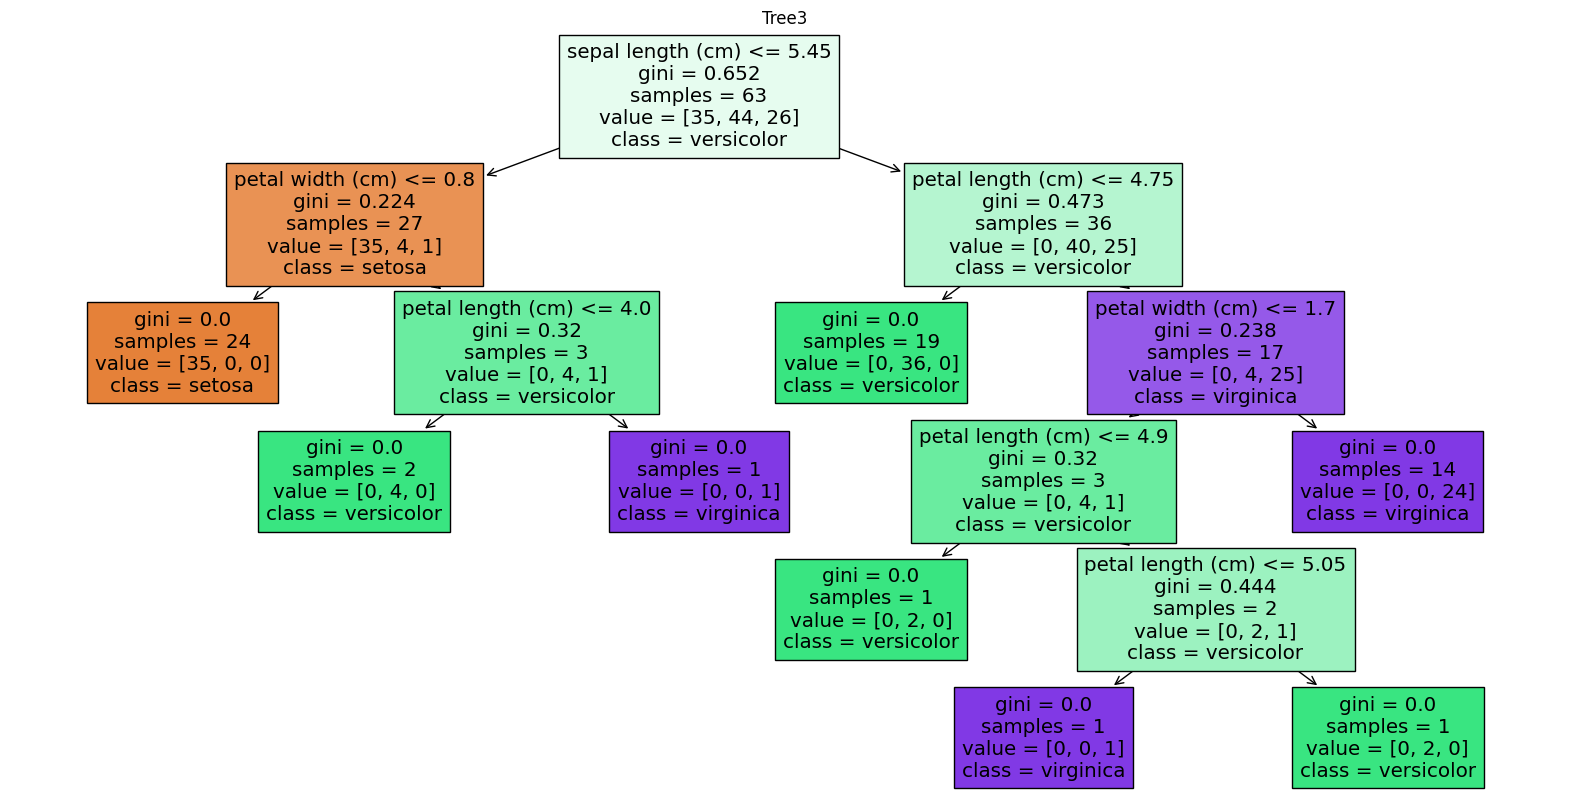

In [9]:
n_trees = 3
for i in range(min(n_trees,len(rf_clf.estimators_))):
    plt.figure(figsize=(20,10))
    plot_tree(rf_clf.estimators_[i],filled=True,feature_names=iris.feature_names, class_names=iris_lst)
    plt.title(f'Tree{i+1}')


# K-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_clf, X , Y , cv= 10)
print('cross-val score = ',score)
print('\naverage cross-val score = ',score.mean())

cross-val score =  [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]

average cross-val score =  0.96


### Grid Search CV

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
    "n_estimators":[10,70,200],
    "max_depth":[10,20,30,100]
    }

In [13]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring="accuracy")    # n_jobs= -1 
grid_search.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid={'max_depth': [10, 20, 30, 100],
                         'n_estimators': [10, 70, 200]},
             scoring='accuracy')

In [14]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 200}

### Random Search CV

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
param_dist = {
    "n_estimators":[10,70,200],
    "max_depth":[10,20,30,100]
    }

rf_clf = RandomForestClassifier() 
random_search = RandomizedSearchCV(rf_clf, param_dist, n_iter=6, cv=5, scoring="accuracy")

In [17]:
random_search.fit(X,Y)
random_search.best_params_

{'n_estimators': 10, 'max_depth': 10}

# Naive Bayes Algo.

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_pred = gnb.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
confusion_matrix(Y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 17]], dtype=int64)

In [23]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

